<a href="https://colab.research.google.com/github/Lvaperez/Estad-stica-computarizada/blob/main/Lab4_Muestreo_de_Varianzas_Laura_P%C3%A9rez_Vides.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Estadística Inferencial por Laura Vanessa Pérez Vides**
## **Laboratorio 04. Distribución de Muestreo de la Varianza Muestral**

## *El muestreo consiste en tomar muchas muestras $n$*


# **Distribución de Muestreo de la Varianza Muestral**

La varianza muestral es una medida de la dispersión de los datos en una muestra. Para entender su distribución de muestreo, es importante considerar algunos conceptos clave:

1. **Varianza Poblacional $(σ²)$**: Es la varianza de toda la población. En la práctica, a menudo no la conocemos y la estimamos a partir de una muestra.

2. **Varianza Muestral $(S²)$**: Es una estimación de la varianza poblacional basada en una muestra. Se calcula como:
   $$
   S^2 = \frac{1}{n-1} \sum_{i=1}^{n} (X_i - \bar{X})^2
   $$
   donde $ \bar{X} $ es la media muestral y $ n $ es el tamaño de la muestra.

3. **Distribución de Muestreo de la Varianza Muestral**: Esta distribución describe cómo varía la varianza muestral de muestra a muestra. Si asumimos que los datos provienen de una distribución normal, la distribución de muestreo de la varianza muestral sigue una distribución chi-cuadrado $ \chi^2 $.

### **Distribución Chi-Cuadrado $ \chi^2 $**

La distribución chi-cuadrado es una distribución de probabilidad que surge en el contexto de la varianza muestral. Si tenemos una muestra de tamaño $ n $ de una distribución normal con varianza $ \sigma^2 $, entonces:
$$
\frac{(n-1)S^2}{\sigma^2} \sim \chi^2_{n-1}
$$
Esto significa que la cantidad $ \frac{(n-1)S^2}{\sigma^2} $ sigue una distribución chi-cuadrado con $ n-1 $ grados de libertad.

### **Propiedades de la Distribución de Muestreo de la Varianza Muestral**

1. **Media**: La media de la distribución de muestreo de la varianza muestral es igual a la varianza poblacional:
   $$
   E[s^2] = \sigma^2
   $$

2. **Varianza**: La varianza de la distribución de muestreo de la varianza muestral depende del tamaño de la muestra y de la varianza poblacional:
   $$
   \text{Var}(s^2) = \frac{2\sigma^4}{n-1}
   $$

3. **Forma**: La forma de la distribución de muestreo de la varianza muestral es asimétrica, especialmente para tamaños de muestra pequeños. A medida que el tamaño de la muestra aumenta, la distribución se vuelve más simétrica y se aproxima a una distribución normal.

### **Ejemplo**

Supongamos que tenemos una muestra de tamaño $ n = 10 $ de una población normal con varianza $ \sigma^2 = 4 $. La varianza muestral $ s^2 $ tendrá una distribución de muestreo tal que:
$$
\frac{(10-1)s^2}{4} \sim \chi^2_{9}
$$
Esto significa que podemos usar la distribución chi-cuadrado con 9 grados de libertad para hacer inferencias sobre la varianza muestral.

### **Aplicaciones**

La distribución de muestreo de la varianza muestral es fundamental en muchas técnicas estadísticas, como:

- **Intervalos de confianza para la varianza**: Podemos construir intervalos de confianza para la varianza poblacional utilizando la distribución chi-cuadrado.
- **Pruebas de hipótesis sobre la varianza**: Podemos realizar pruebas de hipótesis para comparar la varianza muestral con un valor hipotético de la varianza poblacional.

**En resumen, la distribución de muestreo de la varianza muestral es una herramienta esencial en estadística inferencial, especialmente cuando se trabaja con datos que se asumen normalmente distribuidos.**

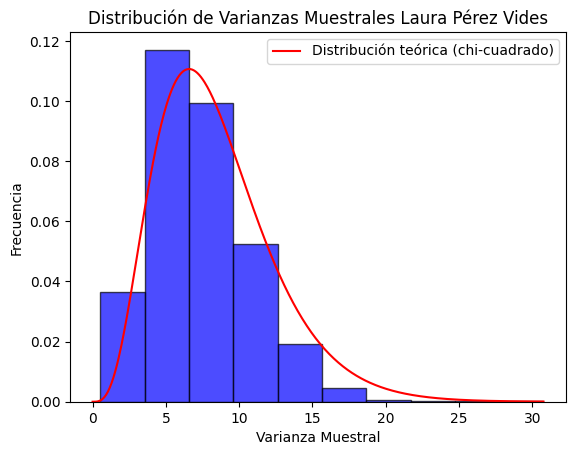

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2 # Import the chi2 object from scipy.stats

# Parámetros de la simulación
poblacion_media = 10  # Media de la población
poblacion_desviacion_estandar = 2.91  # Desviación estándar de la población
tamano_muestra = 10  # Tamaño de cada muestra
num_muestras = 1000  # Número de muestras a tomar

# Generar las muestras
muestras = []
for _ in range(num_muestras):
    muestra = np.random.normal(poblacion_media, poblacion_desviacion_estandar, tamano_muestra)
    muestras.append(muestra)

# Calcular las varianzas de las muestras
varianzas = [np.var(muestra) for muestra in muestras]

# Graficar la distribución de las varianzas muestrales
plt.hist(varianzas, bins=10, density=True, alpha=0.7, color='blue', edgecolor='black')

 #Añadir la distribución teórica (chi-cuadrado escalada - densidad)
x = np.linspace(0, max(varianzas), 500)
df = tamano_muestra - 1  # Grados de libertad
# Calcular la densidad de la distribución chi-cuadrado
chi2_density = chi2.pdf((x * df) / (poblacion_desviacion_estandar**2), df)
# Escalar la densidad para que coincida con la escala de las varianzas muestrales
scaled_chi2_density = chi2_density * (df / poblacion_desviacion_estandar**2)

plt.plot(x, scaled_chi2_density, color='red', label='Distribución teórica (chi-cuadrado)')

# Etiquetas y título
plt.title('Distribución de Varianzas Muestrales - Laura Pérez Vides')
plt.xlabel('Varianza Muestral')
plt.ylabel('Frecuencia')
plt.legend()

# Mostrar el gráfico
plt.show()

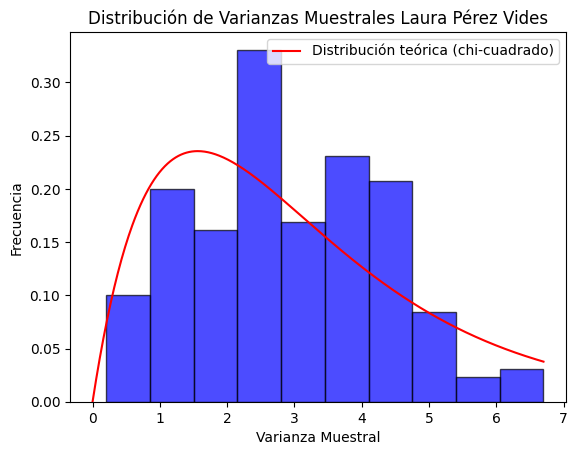

In [3]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random
import numpy as np
from scipy.stats import chi2

n = 200
a = 18  # Edad minima de un Estudiante del curso
b = 23  #  Edad máxima de un Estudiante del curso
x = 1  # nos va indicar el primer lanzamiento
E1 = []  # Edad del Estudiante 1
E2 = []  # Edad del Estudiante 2
E3 = []  # Edad del Estudiante 3
E4 = []  # Edad del Estudiante 4
E5 = []  # Edad del Estudiante 5
suma12 = []  # Edad Total de los cinco estudiantes
media = []  # Edad Promedio de los cinco estudiantes
varianza = []  # Varianza Muestral de la Edad de los cinco estudiantes
suma = 0  # Acumular los resultados sumandolos

while x <= n:  # Esto es para decir que queremos lanzar el dado 10 veces
    valor1 = random.randint(a, b)  # Edad Estudiante 1
    E1.append(valor1)  # Almacenar Edad Estudiante 1
    valor2 = random.randint(a, b)  # Edad Estudiante 2
    E2.append(valor2)  # Almacenar Edad Estudiante 2
    valor3 = random.randint(a, b)  # Edad Estudiante 3
    E3.append(valor3)  # Almacenar Edad Estudiante 3
    valor4 = random.randint(a, b)  # Edad Estudiante 4
    E4.append(valor4)  # Almacenar Edad Estudiante 4
    valor5 = random.randint(a, b)  # Edad Estudiante 5
    E5.append(valor5)  # Almacenar Edad Estudiante 5
    suma12.append(valor1 + valor2 + valor3 + valor4 + valor5)
    # Calculate the mean for the current iteration
    current_mean = (valor1 + valor2 + valor3 + valor4 + valor5) / 5
    media.append(current_mean)
    # Use the current mean for variance calculation
    varianza.append((valor1**2 + valor2**2 + valor3**2 + valor4**2 + valor5**2 - 5 * (current_mean**2)) / 4)
    suma = suma + valor1 + valor2 + valor3 + valor4 + valor5  # Acumulando la suma de los valores obtenidos
    x = x + 1  # el ciclo se cierra y comienza

promedio = suma / n  # Deseo hallar la media de los resultados de los 10 lanzamientos

# Crear el DataFrame de Pandas
EDAD = pd.DataFrame({'E1': E1, 'E2': E2, 'E3': E3, 'E4': E4, 'E5': E5,
                     'Suma': suma12, 'Media': media, 'Varianza': varianza})

# Graficar la distribución de las varianzas muestrales
plt.hist(varianza, bins=10
, density=True, alpha=0.7, color='blue', edgecolor='black')

# Ajustar la distribución teórica (chi-cuadrado escalada - densidad)
# (Se necesitan parámetros adicionales para una correcta adaptación, como la varianza poblacional)
# Ejemplo (asumiendo una varianza poblacional - Adaptar según tu contexto):
poblacion_varianza = np.var(EDAD['E1']) # Reemplaza 'E1' con la columna que representa tu población
x = np.linspace(0, max(varianza), 500)
df = 4  # Grados de libertad (n-1 donde n es el número de datos por muestra - 5 estudiantes)
chi2_density = chi2.pdf((x * df) / poblacion_varianza, df)
scaled_chi2_density = chi2_density * (df / poblacion_varianza)
plt.plot(x, scaled_chi2_density, color='red', label='Distribución teórica (chi-cuadrado)')


plt.title('Distribución de Varianzas Muestrales -  Laura Pérez Vides')
plt.xlabel('Varianza Muestral')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()




/usr/local/lib/python3.11/dist-packages/scipy/stats/_distn_infrastructure.py:2046: RuntimeWarning: invalid value encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


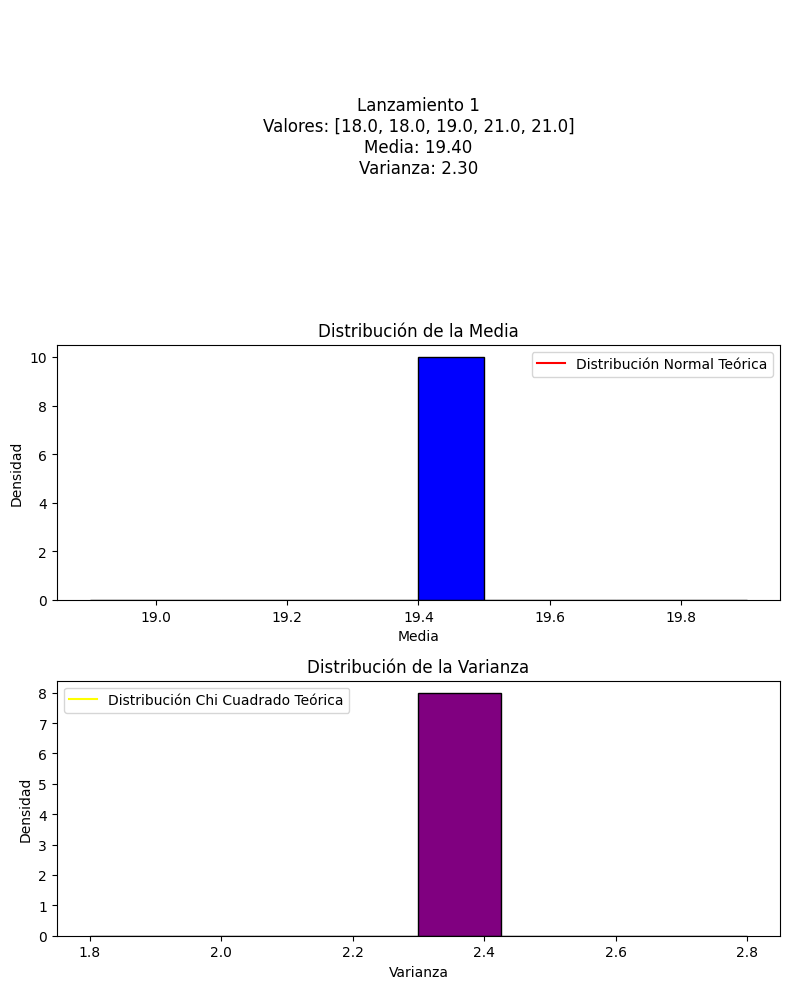

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2, norm
import pandas as pd
import matplotlib.animation as animation
from IPython.display import HTML


# Configuración de la animación
fig, axs = plt.subplots(3, 1, figsize=(8, 10))

def actualizar(i):
    for ax in axs:
        ax.clear()

    # Primer subplot: Información del lanzamiento
    axs[0].text(0.5, 0.5,
                f"Lanzamiento {i + 1}\nValores: {EDAD.iloc[i, :5].tolist()}\nMedia: {EDAD['Media'][i]:.2f}\nVarianza: {EDAD['Varianza'][i]:.2f}",
                fontsize=12, ha='center', va='center', transform=axs[0].transAxes)
    axs[0].axis('off')

    # Segundo subplot: Distribución de la media
    axs[1].hist(EDAD['Media'][:i + 1], bins=10, color='blue', edgecolor='black', density=True)
    axs[1].set_title('Distribución de la Media')
    axs[1].set_xlabel('Media')
    axs[1].set_ylabel('Densidad')

    mu = np.mean(EDAD['Media'][:i + 1])
    sigma = np.std(EDAD['Media'][:i + 1])
    x_norm = np.linspace(min(EDAD['Media'][:i + 1]), max(EDAD['Media'][:i + 1]), 100)
    norm_density = norm.pdf(x_norm, mu, sigma)
    axs[1].plot(x_norm, norm_density, color='red', label='Distribución Normal Teórica')
    axs[1].legend()

    # Tercer subplot: Distribución de la varianza
    axs[2].hist(EDAD['Varianza'][:i + 1], bins=8, color='purple', edgecolor='black', density=True)
    axs[2].set_title('Distribución de la Varianza')
    axs[2].set_xlabel('Varianza')
    axs[2].set_ylabel('Densidad')

    df_chi2 = 5 - 1

    x_chi2 = np.linspace(min(EDAD['Varianza'][:i + 1]), max(EDAD['Varianza'][:i + 1]), 100)
    chi2_density_var = chi2.pdf(x_chi2, df_chi2)
    axs[2].plot(x_chi2, chi2_density_var, color='yellow', label='Distribución Chi Cuadrado Teórica')
    axs[2].legend()

    plt.tight_layout()

ani = animation.FuncAnimation(fig, actualizar, frames=n, interval=500, repeat=False)
HTML(ani.to_html5_video())


## **Análisis de la Varianza Muestral en Experimentos con Dados: 200 Lanzamientos Simulados**



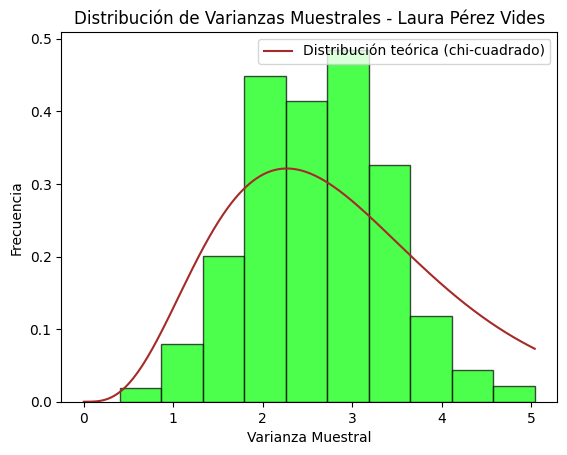

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2 # Import the chi2 object from scipy.stats

# Parámetros de la simulación
poblacion_media = 3.5  # Media teórica de un dado (valores de 1 a 6)
poblacion_desviacion_estandar = np.sqrt(35 / 12)  # Desviación estándar teórica de un dado ≈ 1.7078
tamano_muestra = 10  # Tamaño de cada muestra
num_muestras = 1000  # Número de muestras a tomar

# Generar las muestras
muestras = []
for _ in range(num_muestras):
    muestra = np.random.randint(1, 7, tamano_muestra)  # DADOS: números del 1 al 6
    muestras.append(muestra)

# Calcular las varianzas de las muestras
varianzas = [np.var(muestra) for muestra in muestras]

# Graficar la distribución de las varianzas muestrales
plt.hist(varianzas, bins=10, density=True, alpha=0.7, color='lime', edgecolor='black')

# Añadir la distribución teórica (chi-cuadrado escalada - densidad)
x = np.linspace(0, max(varianzas), 500)
df = tamano_muestra - 1  # Grados de libertad
# Calcular la densidad de la distribución chi-cuadrado
chi2_density = chi2.pdf((x * df) / (poblacion_desviacion_estandar**2), df)
# Escalar la densidad para que coincida con la escala de las varianzas muestrales
scaled_chi2_density = chi2_density * (df / poblacion_desviacion_estandar**2)

plt.plot(x, scaled_chi2_density, color='brown', label='Distribución teórica (chi-cuadrado)')

# Etiquetas y título
plt.title('Distribución de Varianzas Muestrales - Laura Pérez Vides')
plt.xlabel('Varianza Muestral')
plt.ylabel('Frecuencia')
plt.legend()

# Mostrar el gráfico
plt.show()


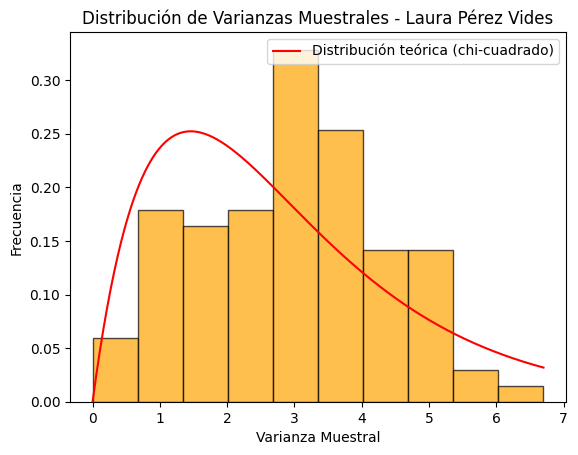

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random
import numpy as np
from scipy.stats import chi2

n = 200
a = 1   # Valor mínimo de un dado
b = 6   # Valor máximo de un dado
x = 1
D1 = []  # Dado 1
D2 = []  # Dado 2
D3 = []  # Dado 3
D4 = []  # Dado 4
D5 = []  # Dado 5
suma12 = []  # Suma de los cinco dados
media = []  # Media de los cinco dados
varianza = []  # Varianza muestral de los cinco dados
suma = 0  # Acumulador de todos los valores

while x <= n:
    valor1 = random.randint(a, b)
    D1.append(valor1)
    valor2 = random.randint(a, b)
    D2.append(valor2)
    valor3 = random.randint(a, b)
    D3.append(valor3)
    valor4 = random.randint(a, b)
    D4.append(valor4)
    valor5 = random.randint(a, b)
    D5.append(valor5)
    suma12.append(valor1 + valor2 + valor3 + valor4 + valor5)
    current_mean = (valor1 + valor2 + valor3 + valor4 + valor5) / 5
    media.append(current_mean)
    varianza.append((valor1**2 + valor2**2 + valor3**2 + valor4**2 + valor5**2 - 5 * (current_mean**2)) / 4)
    suma = suma + valor1 + valor2 + valor3 + valor4 + valor5
    x = x + 1

promedio = suma / n  # Media de los resultados de los 200 lanzamientos

# Crear DataFrame
DADOS = pd.DataFrame({'D1': D1, 'D2': D2, 'D3': D3, 'D4': D4, 'D5': D5,
                      'Suma': suma12, 'Media': media, 'Varianza': varianza})

# Graficar la distribución de las varianzas muestrales
plt.hist(varianza, bins=10, density=True, alpha=0.7, color='orange', edgecolor='black')

# Ajustar la distribución teórica (chi-cuadrado escalada - densidad)
# Estimación de la varianza poblacional (de un dado)
poblacion_varianza = ((6 - 1 + 1)**2 - 1) / 12  # = 35 / 12 ≈ 2.9167

x = np.linspace(0, max(varianza), 500)
df = 4  # Grados de libertad (5 dados - 1)
chi2_density = chi2.pdf((x * df) / poblacion_varianza, df)
scaled_chi2_density = chi2_density * (df / poblacion_varianza)
plt.plot(x, scaled_chi2_density, color='red', label='Distribución teórica (chi-cuadrado)')

plt.title('Distribución de Varianzas Muestrales - Laura Pérez Vides')
plt.xlabel('Varianza Muestral')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()


/usr/local/lib/python3.11/dist-packages/scipy/stats/_distn_infrastructure.py:2046: RuntimeWarning: invalid value encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


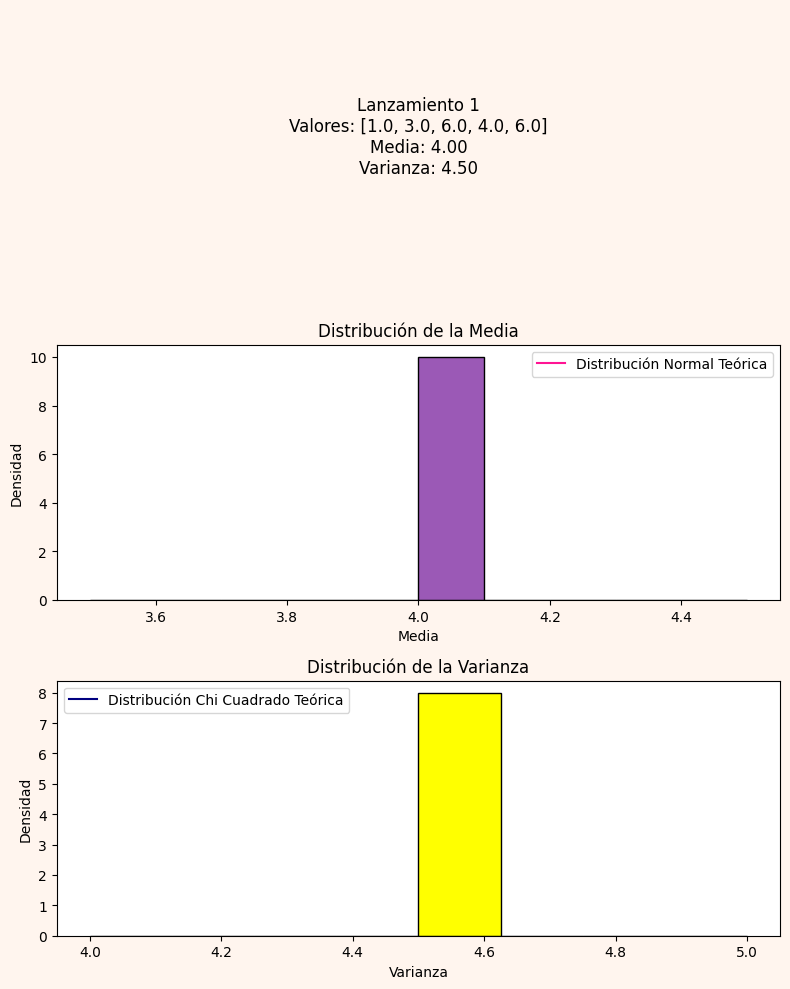

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2, norm
import pandas as pd
import matplotlib.animation as animation
from IPython.display import HTML

fig, axs = plt.subplots(3, 1, figsize=(8, 10))
fig.patch.set_facecolor('seashell')

def actualizar(i):
    for ax in axs:
        ax.clear()

    axs[0].text(0.5, 0.5,
                f"Lanzamiento {i + 1}\nValores: {DADOS.iloc[i, :5].tolist()}\nMedia: {DADOS['Media'][i]:.2f}\nVarianza: {DADOS['Varianza'][i]:.2f}",
                fontsize=12, ha='center', va='center', transform=axs[0].transAxes)
    axs[0].axis('off')

    axs[1].hist(DADOS['Media'][:i + 1], bins=10, color='#9b59b6', edgecolor='black', density=True)
    axs[1].set_title('Distribución de la Media')
    axs[1].set_xlabel('Media')
    axs[1].set_ylabel('Densidad')

    mu = np.mean(DADOS['Media'][:i + 1])
    sigma = np.std(DADOS['Media'][:i + 1])
    x_norm = np.linspace(min(DADOS['Media'][:i + 1]), max(DADOS['Media'][:i + 1]), 100)
    norm_density = norm.pdf(x_norm, mu, sigma)
    axs[1].plot(x_norm, norm_density, color='deeppink', label='Distribución Normal Teórica')
    axs[1].legend()

    axs[2].hist(DADOS['Varianza'][:i + 1], bins=8, color='yellow', edgecolor='black', density=True)
    axs[2].set_title('Distribución de la Varianza')
    axs[2].set_xlabel('Varianza')
    axs[2].set_ylabel('Densidad')

    df_chi2 = 5 - 1

    x_chi2 = np.linspace(min(DADOS['Varianza'][:i + 1]), max(DADOS['Varianza'][:i + 1]), 100)
    chi2_density_var = chi2.pdf(x_chi2, df_chi2)
    axs[2].plot(x_chi2, chi2_density_var, color='navy', label='Distribución Chi Cuadrado Teórica')
    axs[2].legend()

    plt.tight_layout()

ani = animation.FuncAnimation(fig, actualizar, frames=n, interval=500, repeat=False)
HTML(ani.to_html5_video())